## MOVIE RATING PREDICTION WITH PYTHON
1. Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
2. Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [1]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data 
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [3]:
# reading 10 rows of the data
df.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [10]:
data = df.copy(deep = True)

In [11]:
# these columns are removed on basis of its no logic with rating perspective and as per task given
cols = ['Name','Year','Duration','Votes']
data.drop(columns= cols, axis = 1, inplace=True)

In [12]:

# to find distinct values in each column
for i in data.columns:
    print(f'{i}:\n{data[i].unique()}\n')

Genre:
['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical

In [13]:
# splitting genre column records on basis of comma separated values and making the separated values to be given as new record using explode feature
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
print(data.info())
# around 10k rows increased due to explode feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24950 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24950 non-null  object 
 1   Rating    15837 non-null  float64
 2   Director  24408 non-null  object 
 3   Actor 1   23167 non-null  object 
 4   Actor 2   22277 non-null  object 
 5   Actor 3   21425 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB
None


In [14]:
data.isnull().sum()

Genre          0
Rating      9113
Director     542
Actor 1     1783
Actor 2     2673
Actor 3     3525
dtype: int64

In [15]:
# dropping duplicate records
data.drop_duplicates(keep = 'first', inplace=True)
# Remove rows with missing values in all columns (excluding 'Genre' and 'Rating')
data.dropna(subset=data.columns[2:], how='all', inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24087 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24087 non-null  object 
 1   Rating    15827 non-null  float64
 2   Director  24087 non-null  object 
 3   Actor 1   23098 non-null  object 
 4   Actor 2   22250 non-null  object 
 5   Actor 3   21401 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


In [17]:
data.isnull().sum()

Genre          0
Rating      8260
Director       0
Actor 1      989
Actor 2     1837
Actor 3     2686
dtype: int64

In [18]:
# making a copy for different case below
data2 = data.copy(deep=True)

In [19]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [20]:
# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Case 1: To fill all NAN values and keeping the records.

In [21]:
data.describe(include='all')

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
count,24087,15827.000000,24087,23098,22250,21401
unique,24,NaN,5938,4718,4891,4820
top,Drama,NaN,David Dhawan,Ashok Kumar,Rekha,Pran
freq,8714,NaN,110,311,173,176
mean,NaN,5.823542,NaN,NaN,NaN,NaN
std,NaN,1.366780,NaN,NaN,NaN,NaN
min,NaN,1.100000,NaN,NaN,NaN,NaN
25%,NaN,4.900000,NaN,NaN,NaN,NaN
50%,NaN,6.000000,NaN,NaN,NaN,NaN
75%,NaN,6.800000,NaN,NaN,NaN,NaN


In [22]:

# filling rating NAN values with median and Actor NAN values with mode
data['Rating'].fillna(data['Rating'].median(),inplace=True)
data['Actor 1'].fillna(data['Actor 1'].mode()[0],inplace=True)
data['Actor 2'].fillna(data['Actor 2'].mode()[0],inplace=True)
data['Actor 3'].fillna(data['Actor 3'].mode()[0],inplace=True)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24087 entries, 0 to 15508
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genre     24087 non-null  object 
 1   Rating    24087 non-null  float64
 2   Director  24087 non-null  object 
 3   Actor 1   24087 non-null  object 
 4   Actor 2   24087 non-null  object 
 5   Actor 3   24087 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.3+ MB


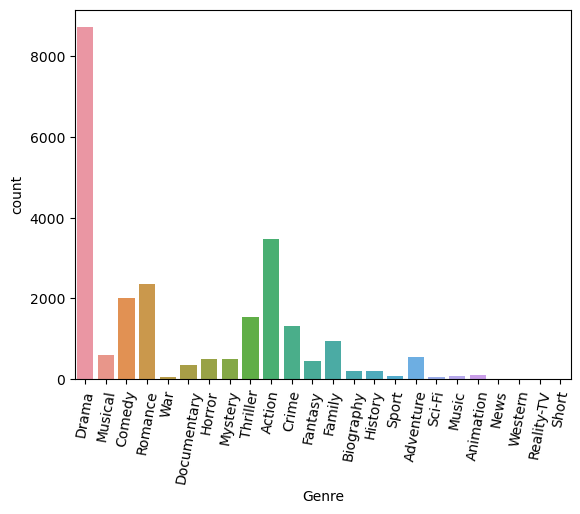

In [24]:
# Plot showing which Genre is highest 
sns.countplot(data=data, x = 'Genre')
plt.xticks(rotation = 80)
plt.show()
# in this we can see most of movies are based on Drama plots while Action plots and Romance plots being second & Third in line respectively.
# whereas there is movies made based on War, Sci-Fi, Music, Animation, News, Western, Reality-Tv, Short plots.

In [25]:
# Grouping the columns with their average rating and then creating a new feature
data['gnr_avg_rating'] = data.groupby('Genre')['Rating'].transform('mean')
data['dir_avg_rating'] = data.groupby('Director')['Rating'].transform('mean')
data['act1_avg_rating'] = data.groupby('Actor 1')['Rating'].transform('mean')
data['act2_avg_rating'] = data.groupby('Actor 2')['Rating'].transform('mean')
data['act3_avg_rating'] = data.groupby('Actor 3')['Rating'].transform('mean')

In [26]:

data.columns

Index(['Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating',
       'act2_avg_rating', 'act3_avg_rating'],
      dtype='object')

In [27]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating', 'act2_avg_rating', 'act3_avg_rating']]
y = data['Rating']

In [28]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 0.41750672982917403
The mean squared error is: 0.35801700943881665
The root mean squared error is: 0.5983452259681
R2 score is: 0.7082396585969182


In [30]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.20540196485401968
The mean squared error is: 0.2750757252894239
The root mean squared error is: 0.5244766203458682
R2 score is: 0.775831356035451


In [31]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.2128949078088556
The mean squared error is: 0.15703017858412666
The root mean squared error is: 0.3962703352310474
R2 score is: 0.872030721148959


In [32]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 0.35005906949271137
The mean squared error is: 0.31941608661177434
The root mean squared error is: 0.5651690778977335
R2 score is: 0.7396968746664707


Note:

1. This case is done and shown as a case study. If the required nan values should be dropped or not. This situation depends on the person who gave the problem statement as of how he wants the model to be predicted and how much important records are.
2. Except Random Forest Regressor which gave r2 score of 0.87 all the algorithms gave r2 score in 0.70s. Same goes for MSE, RMSE and MAE.
3. The purpose to show these many algorithms and metrics is for reference and knowledge of which works better, or else i could create a simple def where it accepts models and data and then make a for loop to input all models rather than this tedious work. It requires just one cell.
# Case 2: To drop maximum NAN values possible

In [33]:
# dropping all Rating NAN values
data2.dropna(subset='Rating',how='any', inplace = True)

In [34]:

data2.isna().sum()

Genre         0
Rating        0
Director      0
Actor 1     159
Actor 2     266
Actor 3     378
dtype: int64

In [35]:
# filling the left NAN values of other columns
data2['Actor 1'].fillna(data2['Actor 1'].mode()[0],inplace=True)
data2['Actor 2'].fillna(data2['Actor 2'].mode()[0],inplace=True)
data2['Actor 3'].fillna(data2['Actor 3'].mode()[0],inplace=True)
data2.isna().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

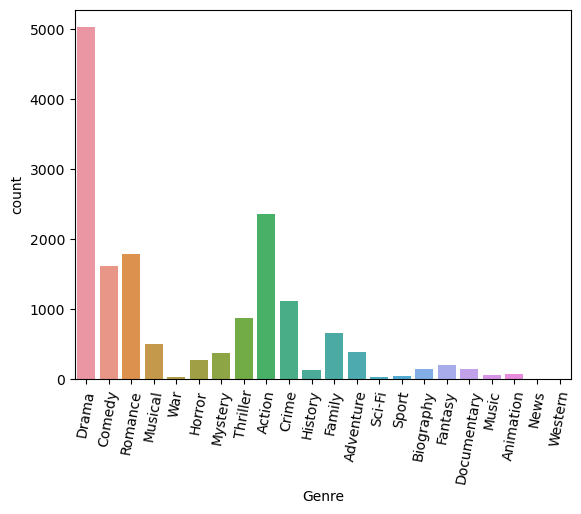

In [36]:
sns.countplot(data=data2, x = 'Genre')
plt.xticks(rotation = 80)
plt.show()
# same observation as above case 1 plot.

In [37]:
# Grouping the columns with their average rating and then creating a new feature
data2['gnr_avg_rating'] = data2.groupby('Genre')['Rating'].transform('mean')
data2['dir_avg_rating'] = data2.groupby('Director')['Rating'].transform('mean')
data2['act1_avg_rating'] = data2.groupby('Actor 1')['Rating'].transform('mean')
data2['act2_avg_rating'] = data2.groupby('Actor 2')['Rating'].transform('mean')
data2['act3_avg_rating'] = data2.groupby('Actor 3')['Rating'].transform('mean')

In [38]:
data2

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,gnr_avg_rating,dir_avg_rating,act1_avg_rating,act2_avg_rating,act3_avg_rating
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.998089,7.000000,6.850000,7.000000,7.000000
3,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.737290,4.400000,5.250000,4.400000,4.460000
3,Romance,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.750533,4.400000,5.250000,4.400000,4.460000
5,Comedy,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.737290,5.353846,4.793617,5.730000,5.909091
5,Drama,4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.998089,5.353846,4.793617,5.730000,5.909091
...,...,...,...,...,...,...,...,...,...,...,...
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.429894,3.970000,6.065347,3.400000,4.600000
15505,Action,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.429894,5.175000,5.440845,4.613333,5.618750
15505,Drama,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.998089,5.175000,5.440845,4.613333,5.618750
15508,Action,6.2,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.429894,4.223684,5.838246,5.522667,5.183333


In [39]:
data2.columns

Index(['Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating',
       'act2_avg_rating', 'act3_avg_rating'],
      dtype='object')

In [40]:
# importing train test model and loading independent variables to x and dependent variables to y
x2 = data2[['gnr_avg_rating', 'dir_avg_rating', 'act1_avg_rating', 'act2_avg_rating', 'act3_avg_rating']]
y2 = data2['Rating']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.3,random_state=1)

In [42]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 0.5173967699897708
The mean squared error is: 0.4827744693266838
The root mean squared error is: 0.6948197387284588
R2 score is: 0.7429561872794896


In [43]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 0.2546746683512319
The mean squared error is: 0.3520757001473995
The root mean squared error is: 0.593359671824265
R2 score is: 0.8125441876444963


In [44]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.26930308937219893
The mean squared error is: 0.2156425641713878
The root mean squared error is: 0.46437330260404486
R2 score is: 0.8851853393226294


In [45]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 0.44053335890897516
The mean squared error is: 0.4213282580374287
The root mean squared error is: 0.6490980342270563
R2 score is: 0.7756720192683856


 Note:

1. This case is done and shown as a case study. If the required nan values should be dropped or not. This situation depends on the person who gave the problem statement as of how he wants the model to be predicted and how much important records are.
2. Except Decision Tree and Random Forest Regressor which gave r2 score of 0.81 & 0.88, all the algorithms gave r2 scores in 0.70s. Same goes for MSE, RMSE and MAE.
3. The purpose to show these many algorithms and metrics is for reference and knowledge of which works better, or else i could create a simple def where it accepts models and data and then make a for loop to input all models rather than this tedious work. It requires just one cell.